# Portafoglio Stonks

In [167]:
#np.lookfor('keyword')
#np.correlate?
#pd.?

np.corrcoef?



L'Azienda degli Ingegneri Matematici ha licenziato il dipendente che ha composto il precedente portafoglio e ora è il tuo compito scegliere le azioni che faranno stonks! Il Responsabile dei finanziamenti Dott. Alex Monte Carlo Money ti concede 1.000.000€ di capitale da investire.

1. [1pt] Importa il file "stonks.csv" come dataframe di pandas, esso contiene i prezzi giornalieri delle azioni di 16 società convertiti in euro dal 1 Gennaio 2016. Salvalo in un dataframe e visualizzalo tramite i metodi head, tail, describe, info

In [159]:
import pandas as pd

df = pd.read_csv('stonks.csv',header=0)

df=df.set_index('Date')

# se ci dovessero essere problemi di codifica utilizza il parametro encoding = "ISO-8859-1" o encoding = "utf-8"

2. [1pt] Scrivi una funzione che consenta di visualizzare il grafico dell'andamento del prezzo di un'azione, possibilmente in un intervallo di tempo compreso tra due date

c:\users\simone\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\simone\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


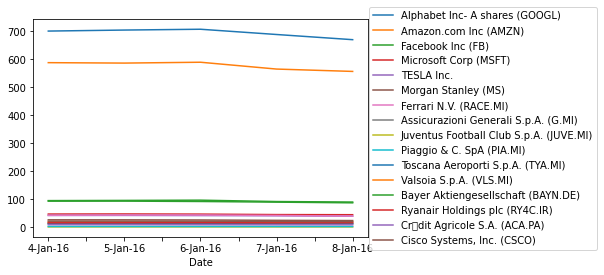

In [160]:
import matplotlib.pyplot as plt

def plotStock( db, data1, data2):
        d=db.loc[data1 : data2]
        d.plot()
        plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))

3. [1pt] Converti il dataframe in numpy, calcola i ritorni giornalieri (prezzo_giorno_successivo/prezzo_giorno_precendete - 1) e visualizzali in 16 plot diversi 

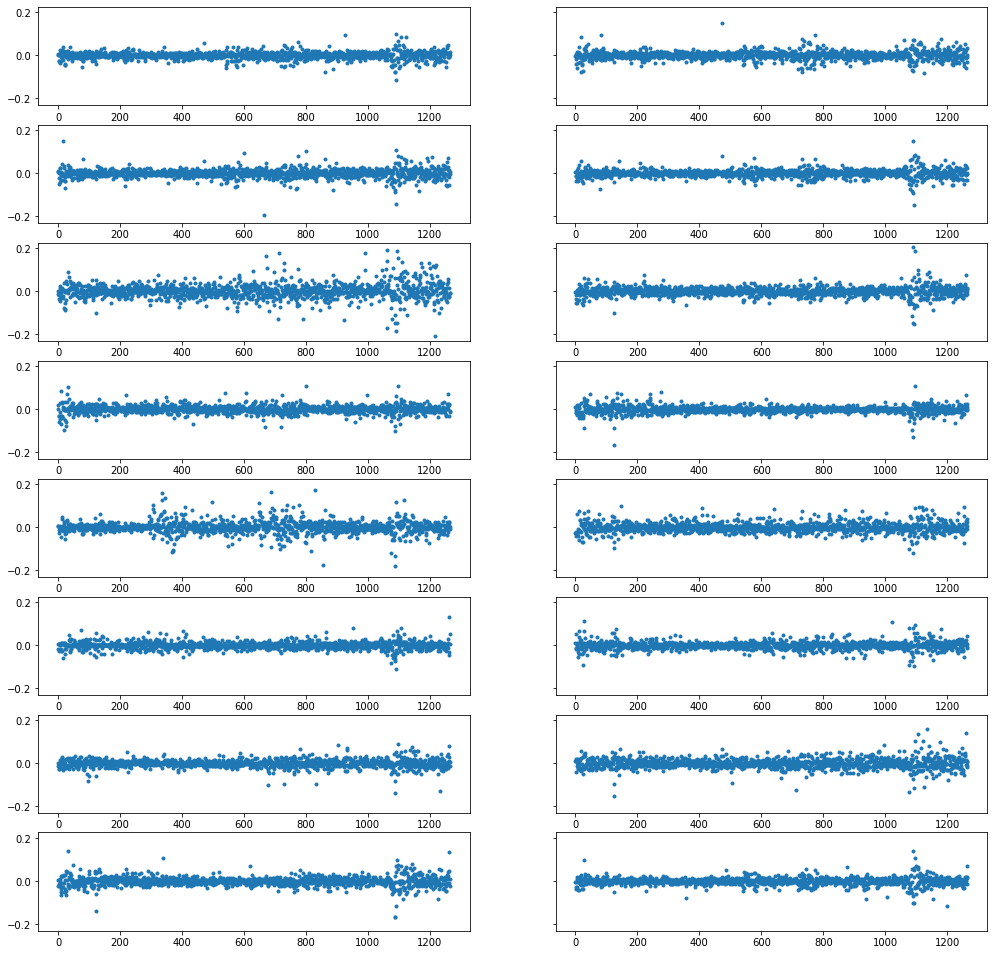

In [161]:
import numpy as np
#np.lookfor('keyword')
db=df.transpose()
dfnp = db.to_numpy()
arr_ritorni=np.ones((16, 1266))
for j in range(16):
    for i in range(1266):
        arr_ritorni[j,i]=(dfnp[j,i+1]/dfnp[j,i])-1
fig, axis=plt.subplots(8,2, sharey=True, figsize=(17,17))
i=0
j=0
for st in arr_ritorni:
    axis[i][j].plot(st,'.')
    if j==1:
        i+=1
        j=0
    else:
        j+=1


4. [1pt] Rispetto ai ritorni, calcola la media, deviazione standard, le correlazioni. 

Quale azione ha ritorni medi maggiori da inizio Gennaio 2016 ad ora? Qual è la più volatile (maggiore deviazione standard)?\
Quale azione ha ritorni medi maggiori da inizio Gennaio 2020 ad ora? Qual è la più volatile (maggiore deviazione standard)?

In [169]:
arr_medie=np.mean(arr_ritorni, axis=1)
arr_devstd=np.nanstd(arr_ritorni, axis=1)
mat_cor=np.corrcoef(arr_ritorni)
posmean=arr_medie.argmax(axis=0)
posstd=arr_devstd.argmax(axis=0)
arr_medie2020=np.mean(arr_ritorni[:,947:1266], axis=1)
arr_devstd2020=np.nanstd(arr_ritorni[:,947:1266], axis=1)
mat_cor2020=np.corrcoef(arr_ritorni[:,947:1266])
posmean2020=arr_medie2020.argmax(axis=0)
posstd2020=arr_devstd2020.argmax(axis=0)
d=pd.read_csv('stonks.csv',header=None)
d=d.set_index(0)
dnp=d.to_numpy()
ddnp=dd.to_numpy()
print('L azione con media dei ritorni maggiore su tutto l arco temporale è: ',dnp[0][posmean])
print('L azione con deviazione standard sui ritorni maggiore su tutto l arco temporale è: ',dnp[0][posstd])
print('L azione con media dei ritorni maggiore sull arco temporale da Gennaio 2020 fino ad adesso è: ',dnp[0][posmean2020])
print('L azione con deviazione standard maggiore sui ritorni sull arco temporale da Gennaio 2020 fino ad adesso è: ', dnp[0][posstd2020])

L azione con media dei ritorni maggiore su tutto l arco temporale è:  TESLA Inc.
L azione con deviazione standard sui ritorni maggiore su tutto l arco temporale è:  TESLA Inc.
L azione con media dei ritorni maggiore sull arco temporale da Gennaio 2020 fino ad adesso è:  TESLA Inc.
L azione con deviazione standard maggiore sui ritorni sull arco temporale da Gennaio 2020 fino ad adesso è:  TESLA Inc.


5. [1pt] Un portafoglio è un insieme di assets, ad esempio:

GOOGL 3 azioni\
AMZN 4 azioni\
FB 5 azioni

Il valore del portafoglio è 3 * prezzo di GOOGL + 4 * prezzo di AMZN + 5 * prezzo di FB

Costruisci il portafoglio che fa stonks nel 2020, ovvero che, se costruito il 01/01/2020 con 1000000€, ad oggi avrebbe il maggior valore, con le seguenti condizioni:

- all'inizio in ogni società non puoi investire più di 200000€ (20%)
- il numero di azioni acquistate di ogni società deve essere un intero non negativo
- non ci sono tassi di interesse, dividendi, commissioni e simili
- bisogna investire almeno il 99% della liquidità, la rimenente non verrà considerat

In [ ]:
# Esempio di portafoglio:

portfolio_test = pd.DataFrame(data={'Code': ["GOOGL","AMZN","FB"], 'NumStocks': [3,4,5],
                                    'Value 01/01/20': [1193.6639,1646.7944,182.9187],
                                    'Value 13/11/20': [1501.4839,2650.7724,234.636]})

print(portfolio_test)

# ...

    Code  NumStocks  Value 01/01/20  Value 13/11/20
0  GOOGL          3       1193.6639       1501.4839
1   AMZN          4       1646.7944       2650.7724
2     FB          5        182.9187        234.6360


FACOLTATIVO PER BONUS: Costruisci ad oggi il portafoglio che avrebbe la migliore performance al 31/12/2020 (implementa la tua strategia preferita)